In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 


In [4]:


df_customers = pd.read_csv("data_2/customers_dataset.csv", sep=",")
df_geolocation = pd.read_csv("data_2/geolocation_dataset.csv", sep=",")
df_order_items = pd.read_csv("data_2/order_items_dataset.csv", sep=",")
df_order_payments = pd.read_csv("data_2/order_payments_dataset.csv", sep=",")
df_order_review = pd.read_csv("data_2/order_review_dataset_clean.csv", sep=",")
df_order = pd.read_csv("data_2/orders_dataset.csv", sep=",")
df_product_categor_name = pd.read_csv("data_2/product_category_name_translation.csv", sep=",")
df_products = pd.read_csv("data_2/products_dataset.csv", sep=",")
df_sellers = pd.read_csv("data_2/sellers_dataset.csv", sep=",")
df_state_name = pd.read_csv("data_2/state_name.csv", sep=",")


In [4]:
#using order_payments and order_purchase_timestamp
df_order_payments.shape
df_order_payments.columns



Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [5]:
df_order_payments.drop(['payment_sequential','payment_type', 'payment_installments', 'payment_value'], axis=1)

,order_id
0,b81ef226f3fe1789b1e8b2acac839d17
1,a9810da82917af2d9aefd1278f1dcfa0
2,25e8ea4e93396b6fa0d3dd708e76c1bd
3,ba78997921bbcdc1373bb41e913ab953
4,42fdf880ba16b47b59251dd489d4441a
...,...
103881,0406037ad97740d563a178ecc7a2075c
103882,7b905861d7c825891d6347454ea7863f
103883,32609bbb3dd69b3c066a6860554a77bf
103884,b8b61059626efa996a60be9bb9320e10


In [6]:
df_order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [7]:

df_order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [8]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
df_order_items = pd.read_csv("data_2/order_items_dataset.csv", index_col="order_id", parse_dates=True)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_10728\2545460787.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_order_items = pd.read_csv("data_2/order_items_dataset.csv", index_col="order_id", parse_dates=True)


In [10]:
df_order_items.head()

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<Axes: xlabel='order_id'>

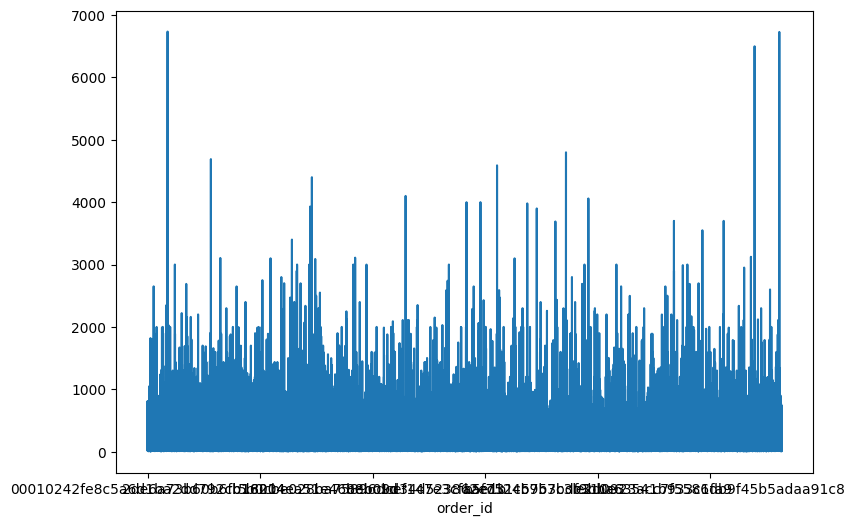

In [11]:
df_order_items['price'].plot(figsize=(9, 6))


In [12]:
df_order_items.index


Index(['00010242fe8c5a6d1ba2dd792cb16214', '00018f77f2f0320c557190d7a144bdd3',
       '000229ec398224ef6ca0657da4fc703e', '00024acbcdf0a6daa1e931b038114c75',
       '00042b26cf59d7ce69dfabb4e55b4fd9', '00048cc3ae777c65dbb7d2a0634bc1ea',
       '00054e8431b9d7675808bcb819fb4a32', '000576fe39319847cbb9d288c5617fa6',
       '0005a1a1728c9d785b8e2b08b904576c', '0005f50442cb953dcd1d21e1fb923495',
       ...
       'fffb9224b6fc7c43ebb0904318b10b5f', 'fffb9224b6fc7c43ebb0904318b10b5f',
       'fffb9224b6fc7c43ebb0904318b10b5f', 'fffb9224b6fc7c43ebb0904318b10b5f',
       'fffbee3b5462987e66fb49b1c5411df2', 'fffc94f6ce00a00581880bf54a75a037',
       'fffcd46ef2263f404302a634eb57f7eb', 'fffce4705a9662cd70adb13d4a31832d',
       'fffe18544ffabc95dfada21779c9644f', 'fffe41c64501cc87c801fd61db3f6244'],
      dtype='object', name='order_id', length=112650)

In [13]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


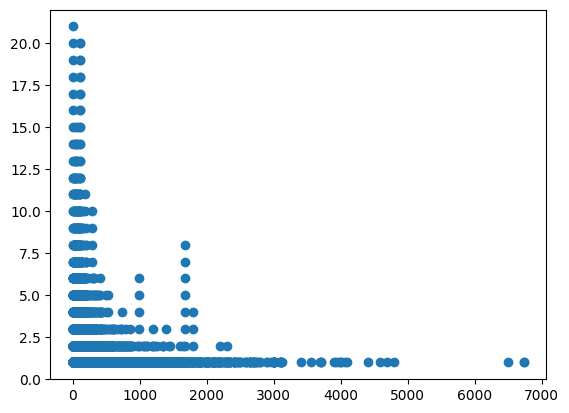

In [14]:
plt.scatter(df_order_items['price'],df_order_items['order_item_id'])

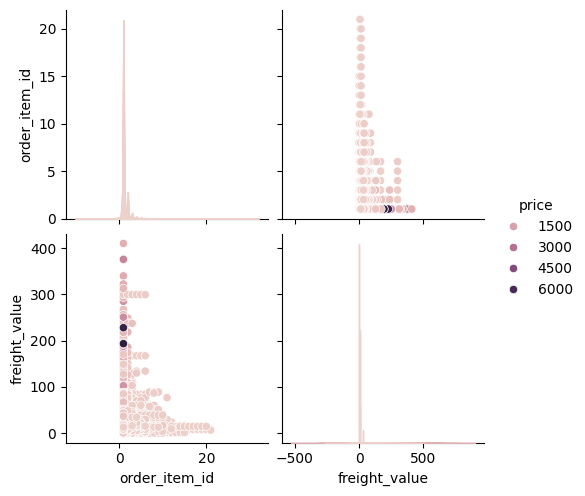

In [15]:
sns.pairplot(df_order_items, hue='price')

In [16]:
df_customers.head()

,"customer_id""",customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<Axes: ylabel='Frequency'>

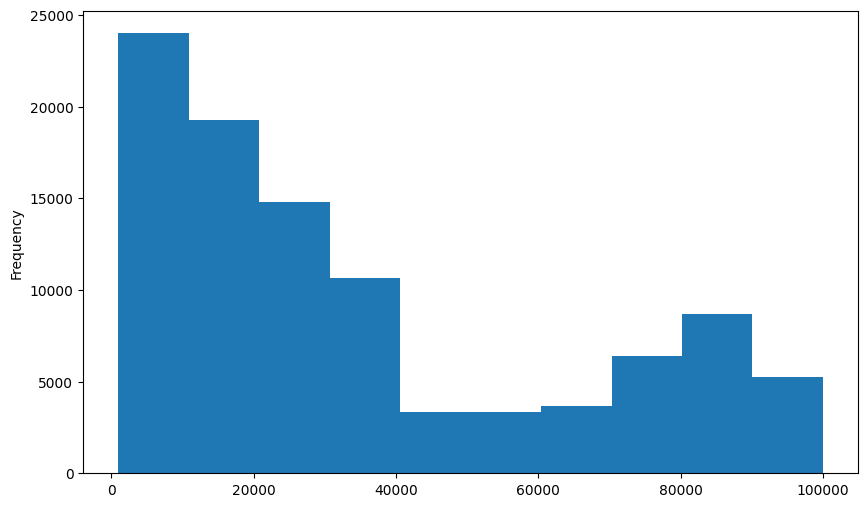

In [17]:
df_customers['customer_zip_code_prefix'].plot(kind='hist', figsize=(10,6))

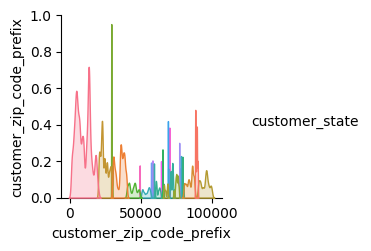

In [18]:
sns.pairplot(df_customers, hue='customer_state')

AttributeError: Line2D.set() got an unexpected keyword argument 'sizes'

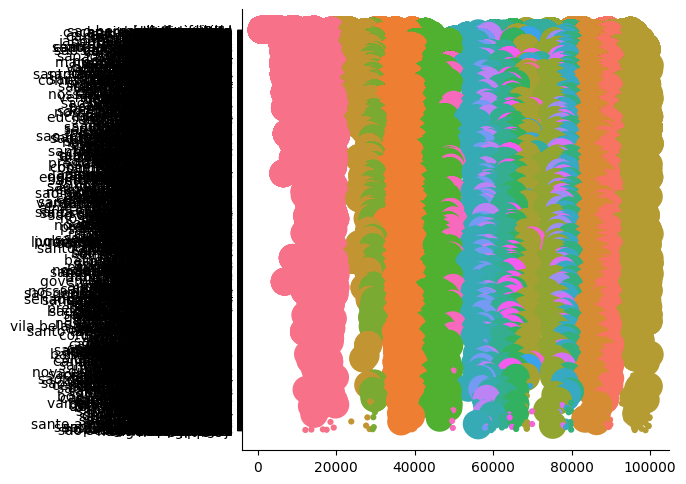

In [38]:
sns.catplot(x="customer_zip_code_prefix", y="customer_city", data=df_customers,  hue="customer_state",sizes=(20,400))

<Axes: >

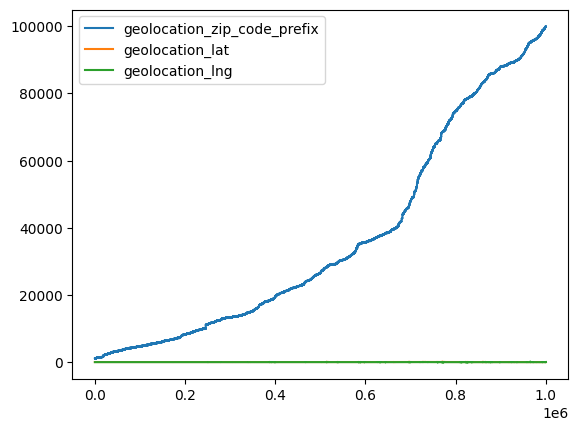

In [62]:
df_geolocation.plot()

In [63]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


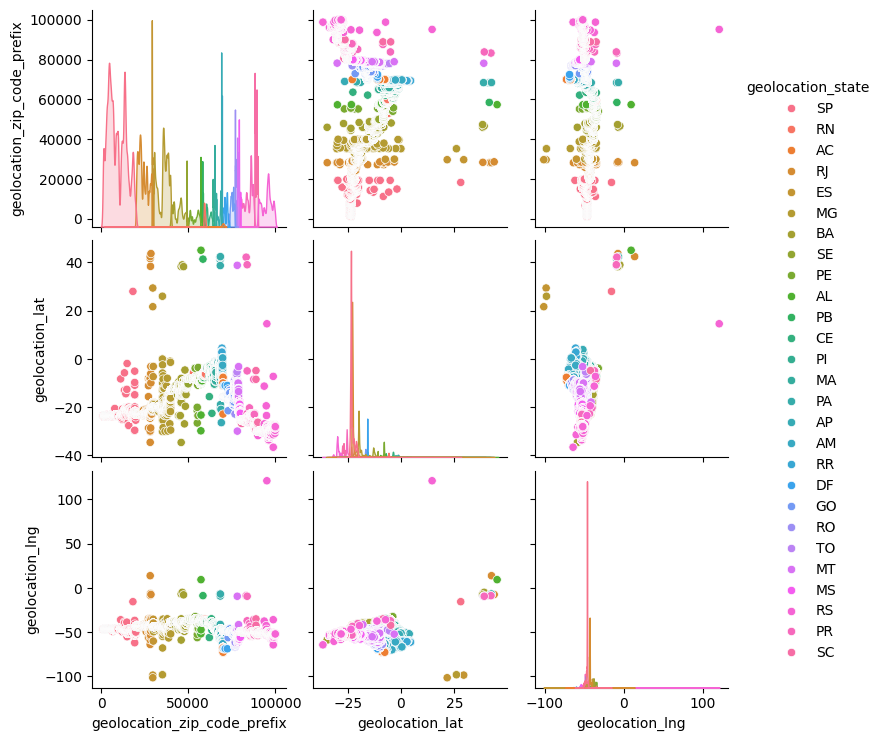

In [74]:
sns.pairplot(df_geolocation, hue='geolocation_state')

In [75]:
df_order_items.head()

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


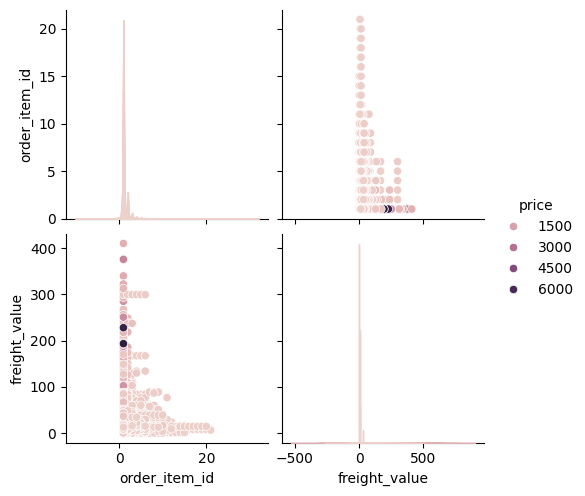

In [76]:
sns.pairplot(df_order_items, hue='price')

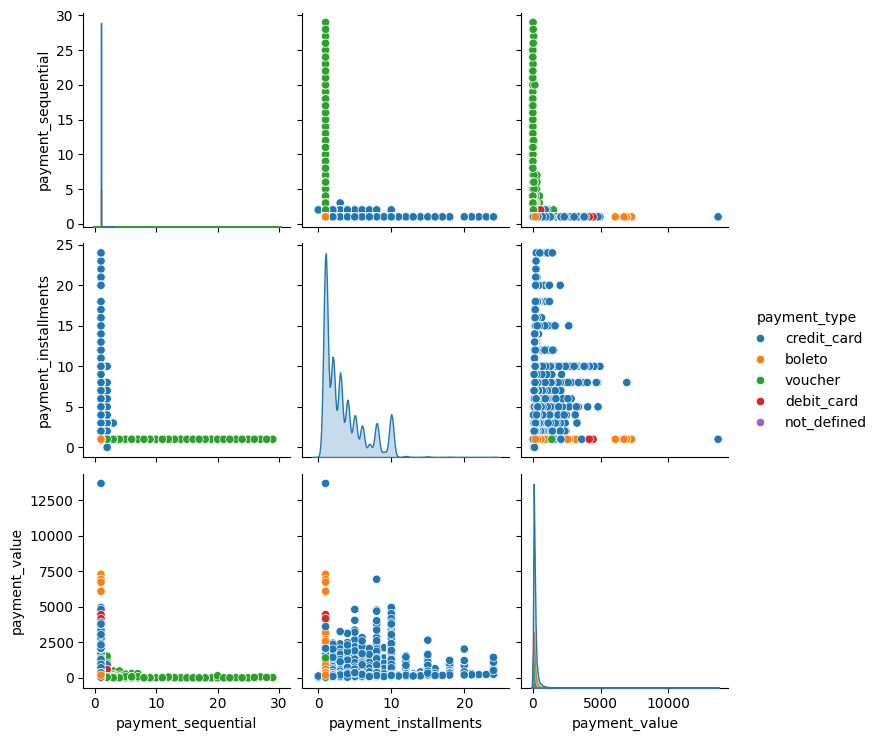

In [ ]:
sns.pairplot(df_order_payments, hue="payment_type")

In [40]:
df_products_redacted = df_products.drop(['product_id', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'], axis=1)
df_products_redacted


,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,perfumaria,225.0,16.0,10.0,14.0
1,artes,1000.0,30.0,18.0,20.0
2,esporte_lazer,154.0,18.0,9.0,15.0
3,bebes,371.0,26.0,4.0,26.0
4,utilidades_domesticas,625.0,20.0,17.0,13.0
...,...,...,...,...,...
32946,moveis_decoracao,12300.0,40.0,40.0,40.0
32947,construcao_ferramentas_iluminacao,1700.0,16.0,19.0,16.0
32948,cama_mesa_banho,1400.0,27.0,7.0,27.0
32949,informatica_acessorios,700.0,31.0,13.0,20.0


In [23]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


<Axes: >

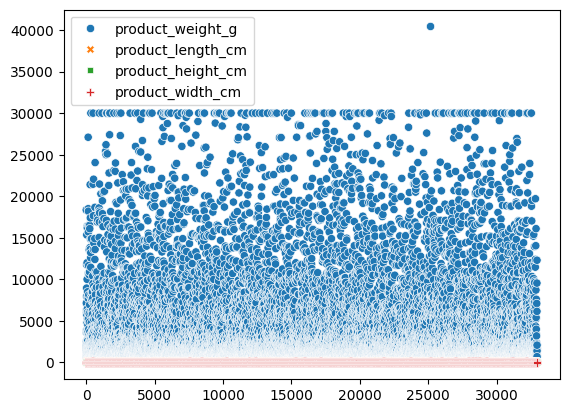

In [58]:
sns.scatterplot(df_products_redacted, alpha=1)

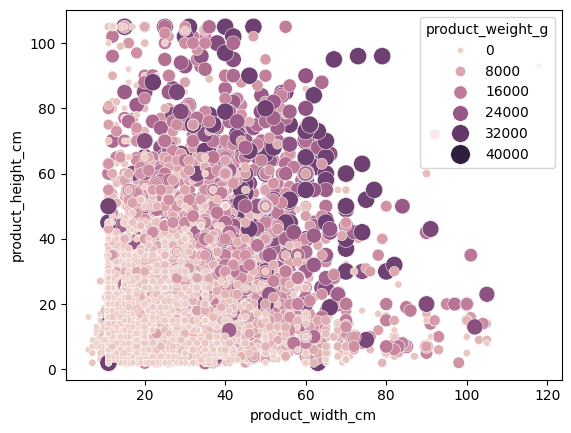

In [55]:
sns.scatterplot(x='product_width_cm', y='product_height_cm', data=df_products_redacted, size='product_weight_g', hue='product_weight_g', alpha=1, sizes=(20, 200) )
plt.show()

<Axes: xlabel='product_length_cm', ylabel='Count'>

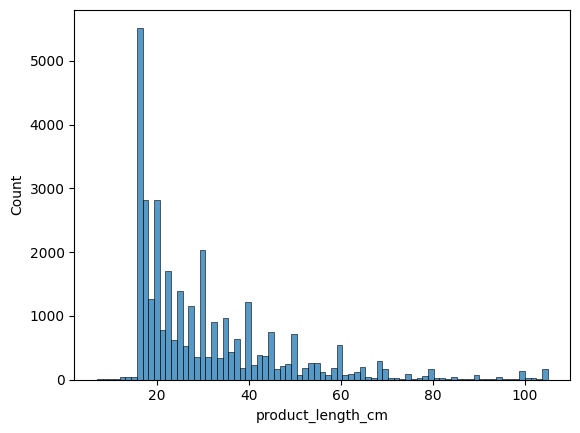

In [84]:
sns.histplot(df_products['product_length_cm'])

<Axes: xlabel='product_length_cm', ylabel='product_weight_g'>

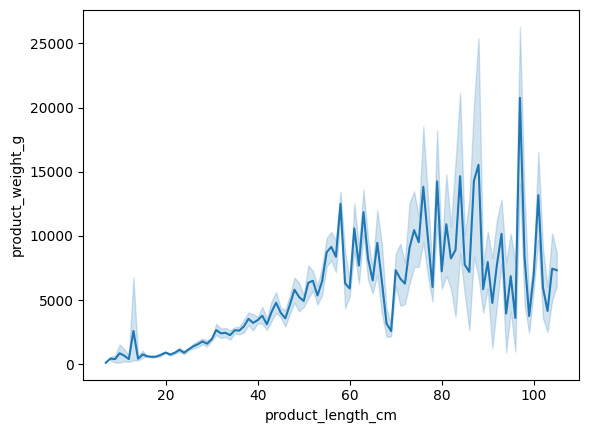

In [73]:
sns.lineplot(x='product_length_cm', y='product_weight_g', data=df_products)

In [76]:
sns.boxplot(x='product_width_cm', y='product_height_cm', data=df_products, hue="product_weight_g")

<Axes: xlabel='product_width_cm', ylabel='product_height_cm'>

C:\Users\Utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Error in callback <function flush_figures at 0x0000027C23AF0CC0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

<Figure size 1200x800 with 0 Axes>

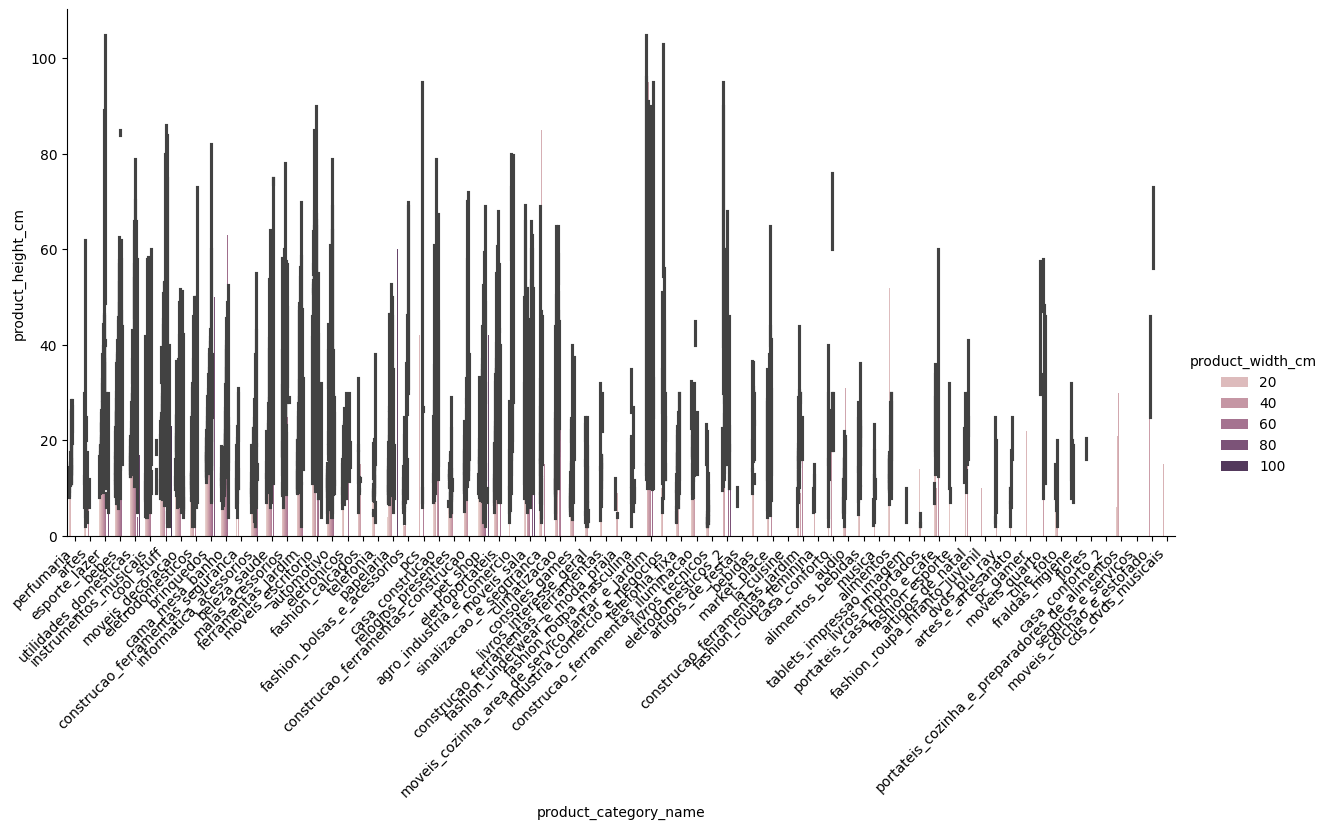

In [78]:
plt.figure(figsize=(12, 8))
sns.catplot(x='product_category_name', y='product_height_cm', data=df_products, hue='product_width_cm', kind='bar', height=6, aspect=2)
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1200x800 with 0 Axes>

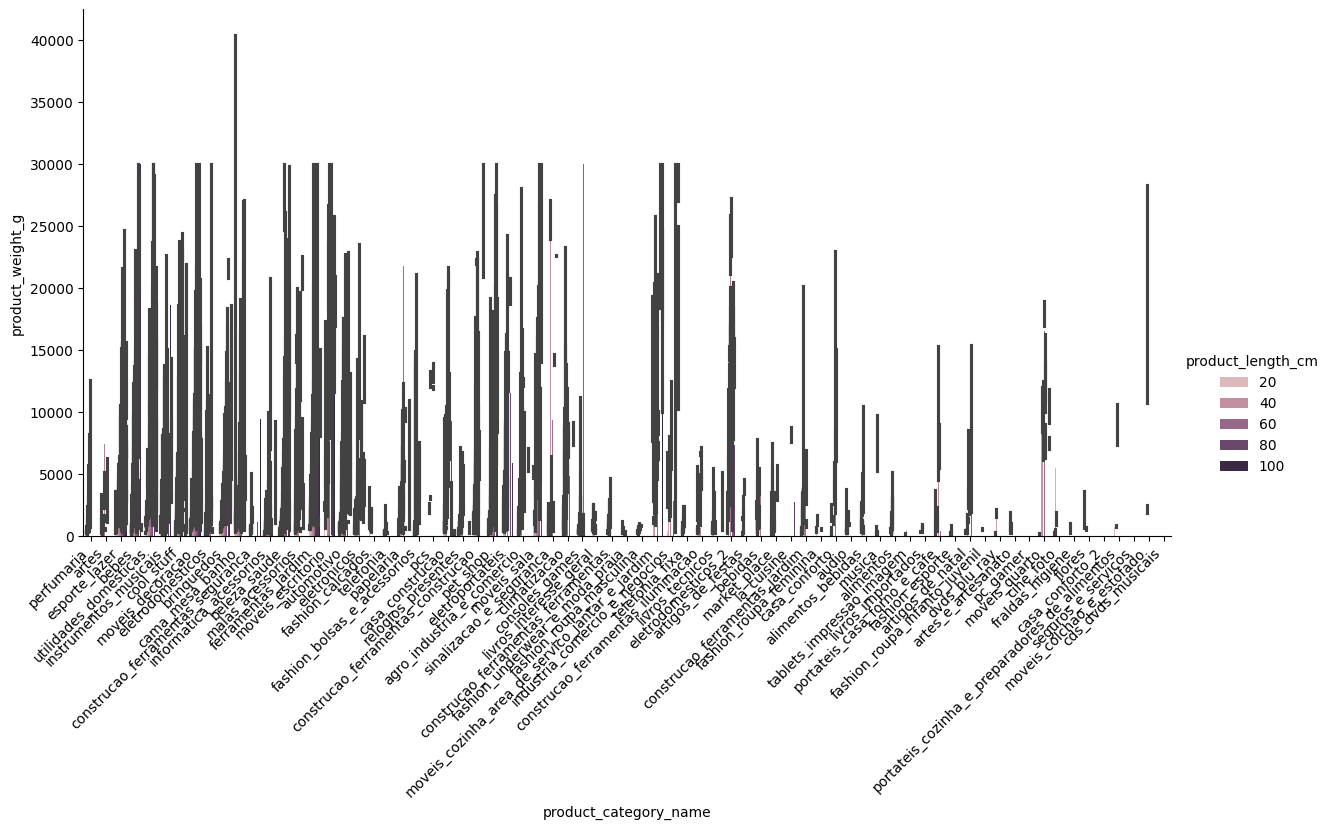

In [63]:
plt.figure(figsize=(12, 8))
sns.catplot(x='product_category_name', y='product_weight_g', data=df_products, hue='product_length_cm', kind='bar', height=6, aspect=2)
plt.xticks(rotation=45, ha='right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x800 with 0 Axes>

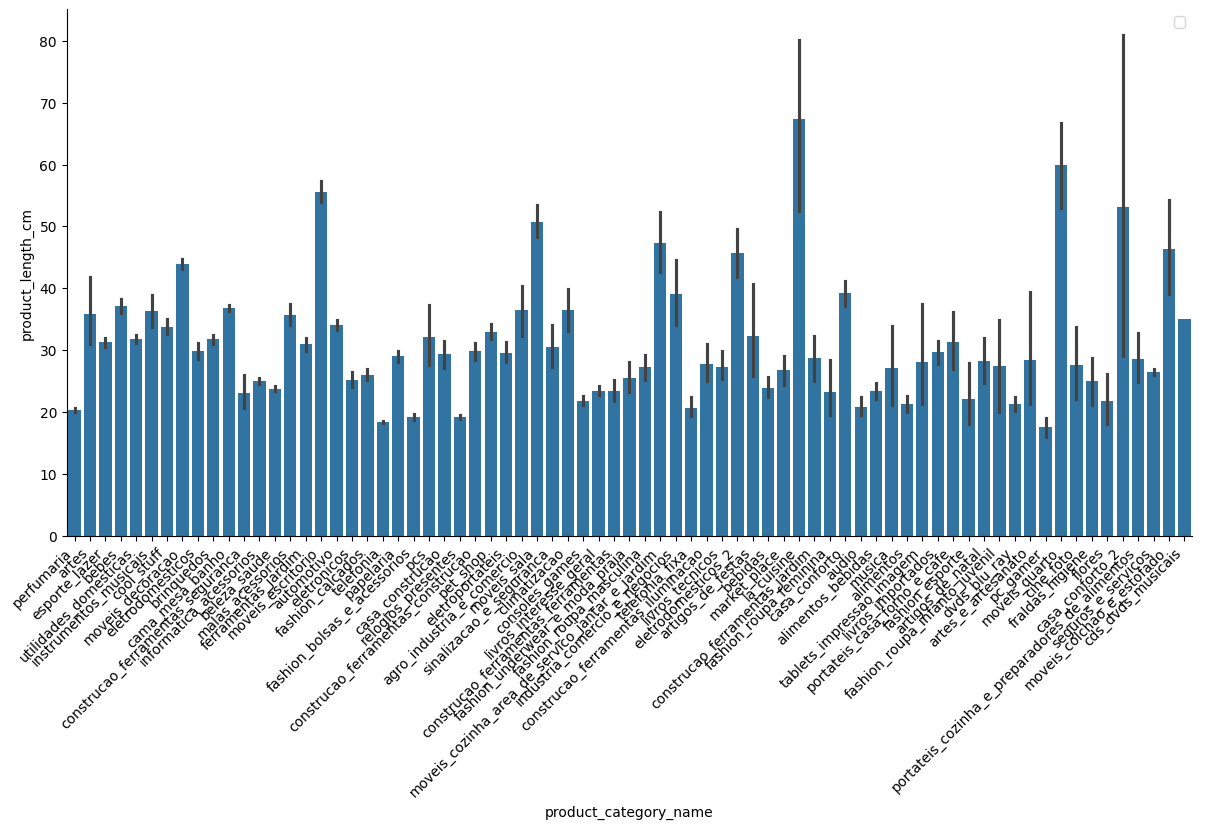

In [86]:
plt.figure(figsize=(12, 8))
sns.catplot(x='product_category_name', y='product_length_cm', data=df_products, kind='bar', height=6, aspect=2)
plt.xticks(rotation=45, ha='right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x800 with 0 Axes>

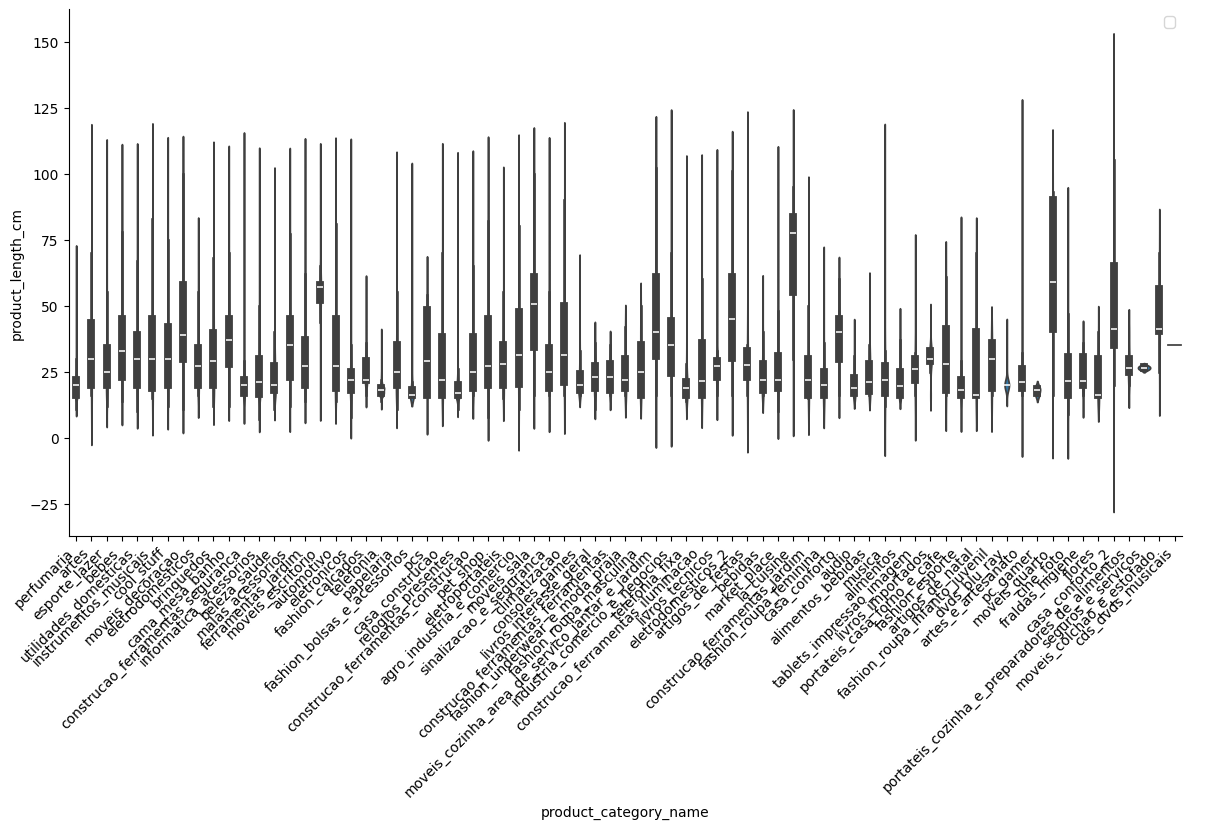

In [88]:
plt.figure(figsize=(12, 8))
sns.catplot(x='product_category_name', y='product_length_cm', data=df_products, kind='violin', height=6, aspect=2)
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
merged_df = pd.merge(df_order_payments, df_order_items, on='order_id', how='outer')
merged_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,credit_card,8.0,99.33,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1.0,credit_card,1.0,24.39,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,credit_card,1.0,65.71,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1.0,credit_card,8.0,107.78,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,42fdf880ba16b47b59251dd489d4441a,1.0,credit_card,2.0,128.45,1.0,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88
...,...,...,...,...,...,...,...,...,...,...,...
118429,b8b61059626efa996a60be9bb9320e10,1.0,credit_card,5.0,369.54,1.0,e9c1abcc7126360336d8f56d49041a8c,679769a98cfcc6da877c8486ff1c13f3,2018-08-13 23:45:00,349.00,20.54
118430,28bbae6599b09d39ca406b747b6632b1,1.0,boleto,1.0,191.58,1.0,1cdfaf0cc5abd6063d3a10ae3318f345,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 02:50:09,169.90,21.68
118431,bfbd0f9bdef84302105ad712db648a6c,NaN,NaN,NaN,NaN,1.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
118432,bfbd0f9bdef84302105ad712db648a6c,NaN,NaN,NaN,NaN,2.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83


In [12]:
df_order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [13]:
df_order_payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [16]:
merged_df = pd.merge(df_order_payments, df_order_items, on='order_id', how='inner')
merged_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88
...,...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,66.31
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2017-08-24 10:04:56,79.00,17.80
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,2017-11-27 17:46:05,39.99,7.78
117599,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,1,e9c1abcc7126360336d8f56d49041a8c,679769a98cfcc6da877c8486ff1c13f3,2018-08-13 23:45:00,349.00,20.54
